In [34]:
from pathlib import Path

def count_csv_rows(file_path, has_header=True):
    """
    Counts the number of rows in a CSV file.
    
    Parameters:
    - file_path (Path): The path to the CSV file.
    - has_header (bool): Whether the CSV file has a header row.
    
    Returns:
    - int: The number of data rows in the CSV file.
    """
    with file_path.open('r', encoding='utf-8') as file:
        row_count = sum(1 for _ in file)
    return row_count - 1 if has_header else row_count

def enumerate_and_sort_csv(datadir, has_header=True):
    """
    Enumerates CSV files in the given directory, counts their rows, and sorts them.
    
    Parameters:
    - datadir (str or Path): The directory containing CSV files.
    - has_header (bool): Whether the CSV files have header rows.
    
    Returns:
    - List of tuples: Each tuple contains (file_name, row_count), sorted by row_count ascending.
    """
    datadir = Path(datadir)
    if not datadir.is_dir():
        raise ValueError(f"The path {datadir} is not a valid directory.")
    
    # Find all CSV files in the directory
    csv_files = list(datadir.glob('*.csv'))
    
    if not csv_files:
        print("No CSV files found in the specified directory.")
        return []
    
    file_row_counts = []
    
    for file in csv_files:
        try:
            rows = count_csv_rows(file, has_header=has_header)
            file_row_counts.append((file.name, rows))
        except Exception as e:
            print(f"Error processing {file.name}: {e}")
    
    # Sort the list of tuples based on row_count (ascending order)
    sorted_files = sorted(file_row_counts, key=lambda x: x[1])
    
    return sorted_files




In [35]:
# Specify the directory containing CSV files
data_directory = 'data/prices'  # Replace with your directory path

# Enumerate and sort CSV files
sorted_csv_files = enumerate_and_sort_csv(data_directory, has_header=True)

if sorted_csv_files:
    print("\nCSV files sorted by number of rows (ascending):")
    for filename, count in sorted_csv_files:
        print(f"{filename}: {count} rows")


CSV files sorted by number of rows (ascending):
INVH.csv: 2196 rows
COWZ.csv: 2222 rows
LW.csv: 2251 rows
HWM.csv: 2258 rows
CTEC.L.csv: 2272 rows
TTD.csv: 2287 rows
FTV.csv: 2342 rows
TEAM.csv: 2484 rows
HPE.csv: 2520 rows
SINCH.ST.csv: 2528 rows
1COV.DE.csv: 2558 rows
VTEB.csv: 2558 rows
KHC.csv: 2594 rows
PYPL.csv: 2594 rows
SHOP.csv: 2625 rows
ETSY.csv: 2649 rows
EVO.ST.csv: 2667 rows
AUTO.L.csv: 2679 rows
QRVO.csv: 2720 rows
KEYS.csv: 2771 rows
CFG.csv: 2789 rows
CZR.csv: 2791 rows
ZAL.DE.csv: 2812 rows
SYF.csv: 2827 rows
IUSB.csv: 2861 rows
DGRO.csv: 2861 rows
ANET.csv: 2865 rows
BME.L.csv: 2874 rows
PAYC.csv: 2901 rows
WLN.PA.csv: 2902 rows
HLT.csv: 2985 rows
ALLE.csv: 3002 rows
QUAL.csv: 3088 rows
CDW.csv: 3102 rows
NWSA.csv: 3108 rows
NWS.csv: 3108 rows
BNDX.csv: 3119 rows
VNA.DE.csv: 3122 rows
IQV.csv: 3136 rows
CCH.L.csv: 3158 rows
ZTS.csv: 3203 rows
NCLH.csv: 3212 rows
ABBV.csv: 3224 rows
IXUS.csv: 3269 rows
IEMG.csv: 3269 rows
IEFA.csv: 3269 rows
FANG.csv: 3277 rows
WDAY.

In [36]:
# find out the stock IDs which has at least 15000 rows of data
stock_ids = [filename[:-4] for filename, count in sorted_csv_files if count >= 15000]

print("\nStock IDs with at least 15000 rows of data:")
for stock_id in stock_ids:
    print(stock_id)



Stock IDs with at least 15000 rows of data:
RTX
LMT
PG
ED
IBM
IP
JNJ
CNP
XOM
CVX
GD
MRK
HPQ
GE
MO
MSI
HON
AEP
MMM
DTE
DIS
KO
CAT
KR
BA


In [37]:
# make one single pandas dataframe contains the data from above stock IDs, the index is the data, the columns are the stock IDs
import pandas as pd
dataframes = []
for stock_id in stock_ids:
    file_path = Path(data_directory) / f"{stock_id}.csv"
    df = pd.read_csv(file_path, usecols=['Date', 'Adj Close'], parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': stock_id}, inplace=True)
    dataframes.append(df)

combined_df = pd.concat(dataframes, axis=1)


In [38]:
combined_df

,RTX,LMT,PG,ED,IBM,IP,JNJ,CNP,XOM,CVX,...,MSI,HON,AEP,MMM,DTE,DIS,KO,CAT,KR,BA
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,0.847133,0.249784,0.244722,1.471740,0.848781,0.061047,0.287279,0.090127,0.314456,...,0.617149,1.040953,0.908272,0.559828,0.393137,0.057441,0.045368,0.464297,0.032189,0.190931
1962-01-03,NaN,0.851761,0.247054,0.244722,1.484606,0.837194,0.060098,0.284472,0.091465,0.313746,...,0.615354,1.052677,0.906616,0.564037,0.389902,0.058212,0.044358,0.468819,0.032866,0.194750
1962-01-04,NaN,0.835559,0.242959,0.243967,1.469810,0.834297,0.059466,0.284472,0.091688,0.310907,...,0.609973,1.059709,0.893381,0.564037,0.386666,0.058212,0.044695,0.480879,0.032730,0.192840
1962-01-05,NaN,0.828616,0.241253,0.238680,1.440865,0.842987,0.058517,0.277609,0.089681,0.303098,...,0.606385,1.057366,0.873528,0.549304,0.378577,0.058405,0.043684,0.485401,0.031919,0.189022
1962-01-08,NaN,0.817043,0.234770,0.239813,1.413848,0.825606,0.057568,0.274490,0.089457,0.301679,...,0.595621,1.062055,0.866911,0.546147,0.379386,0.058212,0.043235,0.488416,0.031784,0.189499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-20,160.710007,505.899994,151.960007,101.720001,283.649994,47.889999,193.720001,40.220001,112.699997,154.479996,...,448.440002,206.029999,117.820000,154.779999,143.320007,111.959999,68.440002,531.179993,69.150002,216.820007
2025-10-21,173.039993,489.500000,151.619995,101.559998,282.049988,47.680000,191.880005,40.029999,112.709999,153.789993,...,448.100006,209.080002,117.430000,166.639999,142.270004,114.300003,71.220001,524.650024,67.599998,217.259995
2025-10-22,177.979996,487.140015,152.199997,101.940002,287.510010,47.950001,192.940002,40.049999,114.709999,155.570007,...,446.859985,206.610001,117.269997,167.229996,142.690002,113.080002,70.809998,513.909973,68.599998,216.589996


In [39]:
# now imputate missing data, first make forwarding fill, then backward fill, to make sure there is no NaN in the table
combined_df.fillna(method='ffill', inplace=True)
combined_df.fillna(method='bfill', inplace=True)
combined_df

/tmp/ipykernel_1027483/3205725967.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)
/tmp/ipykernel_1027483/3205725967.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='bfill', inplace=True)


,RTX,LMT,PG,ED,IBM,IP,JNJ,CNP,XOM,CVX,...,MSI,HON,AEP,MMM,DTE,DIS,KO,CAT,KR,BA
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,0.091170,0.847133,0.249784,0.244722,1.471740,0.848781,0.061047,0.287279,0.090127,0.314456,...,0.617149,1.040953,0.908272,0.559828,0.393137,0.057441,0.045368,0.464297,0.032189,0.190931
1962-01-03,0.091170,0.851761,0.247054,0.244722,1.484606,0.837194,0.060098,0.284472,0.091465,0.313746,...,0.615354,1.052677,0.906616,0.564037,0.389902,0.058212,0.044358,0.468819,0.032866,0.194750
1962-01-04,0.091170,0.835559,0.242959,0.243967,1.469810,0.834297,0.059466,0.284472,0.091688,0.310907,...,0.609973,1.059709,0.893381,0.564037,0.386666,0.058212,0.044695,0.480879,0.032730,0.192840
1962-01-05,0.091170,0.828616,0.241253,0.238680,1.440865,0.842987,0.058517,0.277609,0.089681,0.303098,...,0.606385,1.057366,0.873528,0.549304,0.378577,0.058405,0.043684,0.485401,0.031919,0.189022
1962-01-08,0.091170,0.817043,0.234770,0.239813,1.413848,0.825606,0.057568,0.274490,0.089457,0.301679,...,0.595621,1.062055,0.866911,0.546147,0.379386,0.058212,0.043235,0.488416,0.031784,0.189499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-20,160.710007,505.899994,151.960007,101.720001,283.649994,47.889999,193.720001,40.220001,112.699997,154.479996,...,448.440002,206.029999,117.820000,154.779999,143.320007,111.959999,68.440002,531.179993,69.150002,216.820007
2025-10-21,173.039993,489.500000,151.619995,101.559998,282.049988,47.680000,191.880005,40.029999,112.709999,153.789993,...,448.100006,209.080002,117.430000,166.639999,142.270004,114.300003,71.220001,524.650024,67.599998,217.259995
2025-10-22,177.979996,487.140015,152.199997,101.940002,287.510010,47.950001,192.940002,40.049999,114.709999,155.570007,...,446.859985,206.610001,117.269997,167.229996,142.690002,113.080002,70.809998,513.909973,68.599998,216.589996


In [40]:
# make log returns instead of prices for above dataframe
import numpy as np
log_returns_df = np.log(combined_df / combined_df.shift(1))
log_returns_df = log_returns_df.dropna()  # Drop the first row with NaN
log_returns_df

,RTX,LMT,PG,ED,IBM,IP,JNJ,CNP,XOM,CVX,...,MSI,HON,AEP,MMM,DTE,DIS,KO,CAT,KR,BA
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-03,0.000000,0.005449,-0.010990,0.000000,0.008703,-0.013746,-0.015670,-0.009819,0.014741,-0.002261,...,-0.002913,0.011199,-0.001825,0.007491,-0.008264,0.013333,-0.022532,0.009693,0.020790,0.019803
1962-01-04,0.000000,-0.019205,-0.016714,-0.003091,-0.010016,-0.003466,-0.010578,0.000000,0.002436,-0.009090,...,-0.008784,0.006659,-0.014706,0.000000,-0.008333,0.000000,0.007570,0.025398,-0.004123,-0.009852
1962-01-05,0.000000,-0.008344,-0.007047,-0.021910,-0.019889,0.010363,-0.016090,-0.024419,-0.022140,-0.025435,...,-0.005900,-0.002214,-0.022473,-0.026468,-0.021143,0.003308,-0.022876,0.009360,-0.025106,-0.020000
1962-01-08,0.000000,-0.014066,-0.027242,0.004736,-0.018928,-0.020834,-0.016348,-0.011300,-0.002492,-0.004695,...,-0.017910,0.004425,-0.007605,-0.005763,0.002135,-0.003308,-0.010335,0.006192,-0.004246,0.002521
1962-01-09,0.000000,0.008463,-0.001455,-0.001577,0.011759,-0.014135,0.010929,0.000000,-0.002496,0.014019,...,-0.024393,-0.002211,-0.007663,0.000000,0.002130,0.019676,0.018017,0.009217,-0.021507,0.002516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-20,0.017323,0.021478,0.003692,0.005224,0.008390,0.027735,0.002584,0.014526,0.004090,0.009104,...,0.007701,0.015013,0.002464,0.013923,0.009605,0.011589,0.000000,0.010618,0.002317,0.018057
2025-10-21,0.073921,-0.032955,-0.002240,-0.001574,-0.005657,-0.004395,-0.009544,-0.004735,0.000089,-0.004477,...,-0.000758,0.014695,-0.003316,0.073831,-0.007353,0.020685,0.039816,-0.012370,-0.022670,0.002027
2025-10-22,0.028148,-0.004833,0.003818,0.003735,0.019173,0.005647,0.005509,0.000500,0.017589,0.011508,...,-0.002771,-0.011884,-0.001363,0.003534,0.002948,-0.010731,-0.005773,-0.020683,0.014685,-0.003089


In [54]:
import numpy as np
import pandas as pd

# parameters
historical_days = 512  
# assume log_returns_df is your DataFrame and stock_ids is the list of stock columns

# 1. Extract the data as a NumPy array (shape: (n_days, n_stocks))
data = log_returns_df[stock_ids].values
n_days, n_stocks = data.shape

# 2. Use sliding_window_view along axis=0.
#    The output shape is (n_days - historical_days + 1, n_stocks, historical_days)
windows = np.lib.stride_tricks.sliding_window_view(data, window_shape=historical_days, axis=0)

# 3. Select windows corresponding to i = historical_days to n_days - 1.
#    The original loop uses for i in range(historical_days, n_days) and for each i,
#    the window to collect is: [ log_returns_df.iloc[i],
#                                log_returns_df.iloc[i-1],
#                                …,
#                                log_returns_df.iloc[i-historical_days+1] ]
#    With the output shape above, the proper index is windows[1:], which has shape (n_days - historical_days, n_stocks, historical_days)

selected_windows = windows[0:]

# 4. Reverse along the last axis to have the most recent data first.
#    That is, for each sliding window, reverse the chronological order.
selected_windows = selected_windows[..., ::-1]  # now each window's last axis is reversed

# 5. For each row, flatten the data so that the data ordering is:
#    For each stock in stock_ids: [most_recent, next, ..., oldest] 
#    This order is naturally obtained by flattening each (n_stocks, historical_days) window in C order.
wider_array = selected_windows.reshape(selected_windows.shape[0], -1)

# 6. Create the column names. For each stock, we create names in the order "{stock_id}_j"
#    where j=0 is the most recent day, followed by older days.
column_names = []
for stock_id in stock_ids:
    for j in range(historical_days):
        column_names.append(f"{stock_id}_{j}")

# 7. Build and display the new, wider DataFrame.
wider_df = pd.DataFrame(wider_array, columns=column_names)
wider_df


,RTX_0,RTX_1,RTX_2,RTX_3,RTX_4,RTX_5,RTX_6,RTX_7,RTX_8,RTX_9,...,BA_502,BA_503,BA_504,BA_505,BA_506,BA_507,BA_508,BA_509,BA_510,BA_511
0,-0.011906,-0.020498,-0.005780,-0.011462,0.008585,0.002877,0.020379,0.000000,-0.011697,0.005832,...,-0.007436,-0.019561,0.026996,0.009999,0.000000,0.002516,0.002521,-0.020000,-0.009852,0.019803
1,-0.006007,-0.011906,-0.020498,-0.005780,-0.011462,0.008585,0.002877,0.020379,0.000000,-0.011697,...,0.002485,-0.007436,-0.019561,0.026996,0.009999,0.000000,0.002516,0.002521,-0.020000,-0.009852
2,-0.012120,-0.006007,-0.011906,-0.020498,-0.005780,-0.011462,0.008585,0.002877,0.020379,0.000000,...,0.004951,0.002485,-0.007436,-0.019561,0.026996,0.009999,0.000000,0.002516,0.002521,-0.020000
3,0.015128,-0.012120,-0.006007,-0.011906,-0.020498,-0.005780,-0.011462,0.008585,0.002877,0.020379,...,0.045846,0.004951,0.002485,-0.007436,-0.019561,0.026996,0.009999,0.000000,0.002516,0.002521
4,-0.003009,0.015128,-0.012120,-0.006007,-0.011906,-0.020498,-0.005780,-0.011462,0.008585,0.002877,...,-0.002361,0.045846,0.004951,0.002485,-0.007436,-0.019561,0.026996,0.009999,0.000000,0.002516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,0.017323,0.005714,0.000318,-0.015171,0.003456,0.007266,-0.028012,-0.038644,-0.004144,0.002780,...,0.000485,0.003617,0.000108,-0.033974,-0.024629,0.013039,0.026388,0.005906,0.005834,-0.002359
15546,0.073921,0.017323,0.005714,0.000318,-0.015171,0.003456,0.007266,-0.028012,-0.038644,-0.004144,...,-0.015741,0.000485,0.003617,0.000108,-0.033974,-0.024629,0.013039,0.026388,0.005906,0.005834
15547,0.028148,0.073921,0.017323,0.005714,0.000318,-0.015171,0.003456,0.007266,-0.028012,-0.038644,...,-0.015159,-0.015741,0.000485,0.003617,0.000108,-0.033974,-0.024629,0.013039,0.026388,0.005906
15548,0.008170,0.028148,0.073921,0.017323,0.005714,0.000318,-0.015171,0.003456,0.007266,-0.028012,...,0.005484,-0.015159,-0.015741,0.000485,0.003617,0.000108,-0.033974,-0.024629,0.013039,0.026388


In [57]:
# first 2520 rows for autoencoder
wider_df_for_autoencoder = wider_df.iloc[:2520]

# now with wider_df_for_autoencoder, we split the rows into training and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(wider_df_for_autoencoder, test_size=0.2, random_state=42)


Epoch [1/15], Train Loss: 0.926306, Test Loss: 0.720919
Epoch [2/15], Train Loss: 0.446601, Test Loss: 0.188368
Epoch [3/15], Train Loss: 0.094990, Test Loss: 0.055553
Epoch [4/15], Train Loss: 0.043738, Test Loss: 0.036484
Epoch [5/15], Train Loss: 0.030786, Test Loss: 0.026651
Epoch [6/15], Train Loss: 0.023054, Test Loss: 0.020511
Epoch [7/15], Train Loss: 0.018262, Test Loss: 0.016659
Epoch [8/15], Train Loss: 0.015159, Test Loss: 0.014094
Epoch [9/15], Train Loss: 0.013042, Test Loss: 0.012309
Epoch [10/15], Train Loss: 0.011521, Test Loss: 0.010977
Epoch [11/15], Train Loss: 0.010341, Test Loss: 0.009903
Epoch [12/15], Train Loss: 0.009367, Test Loss: 0.009002
Epoch [13/15], Train Loss: 0.008537, Test Loss: 0.008223
Epoch [14/15], Train Loss: 0.007813, Test Loss: 0.007538
Epoch [15/15], Train Loss: 0.007176, Test Loss: 0.006939


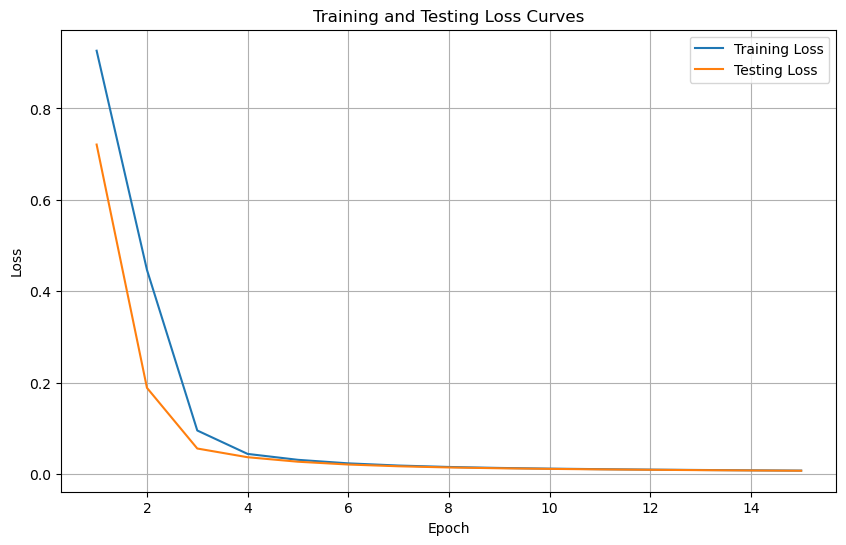

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # For robust normalization
import numpy as np

# Ensure reproducibility
torch.manual_seed(42)

# --- Data Preparation with StandardScaler ---
# Assuming train_df and test_df are pandas DataFrames
# Convert to numpy for scaling and then back to tensor
scaler = StandardScaler()

# Fit on training data AND transform both train and test data
# IMPORTANT: Fit scaler only on training data to avoid data leakage
train_scaled = scaler.fit_transform(train_df.values)
test_scaled = scaler.transform(test_df.values)

# Add channel dimension for Conv1d: (batch_size, channels, length)
train_tensor = torch.tensor(train_scaled, dtype=torch.float32).unsqueeze(1)
test_tensor = torch.tensor(test_scaled, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(train_tensor, train_tensor)
test_dataset = TensorDataset(test_tensor, test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class SparseConvAutoencoder(nn.Module):
    def __init__(self, input_length, sparsity_param=0.05, beta=1e-3):
        super(SparseConvAutoencoder, self).__init__()
        self.sparsity_param = sparsity_param
        self.beta = beta

        # Encoder with reduced channels and smaller kernel size
        self.encoder = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=8, kernel_size=2, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=8, out_channels=16, kernel_size=2, stride=2, padding=1),
            nn.ReLU()
        )

        # Decoder with reduced channels and smaller kernel size
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(in_channels=16, out_channels=8, kernel_size=2, stride=2, padding=1, output_padding=1),
            nn.LeakyReLU(0.01),
            nn.ConvTranspose1d(in_channels=8, out_channels=1, kernel_size=2, stride=2, padding=1, output_padding=0),
            nn.Identity()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def sparsity_loss(self, hidden):
        rho_hat = torch.mean(hidden, dim=(0, 2))
        rho = torch.full_like(rho_hat, self.sparsity_param)
        kl_divergence = rho * torch.log(rho / (rho_hat + 1e-10)) + \
                        (1 - rho) * torch.log((1 - rho) / (1 - rho_hat + 1e-10))
        return self.beta * torch.sum(kl_divergence)

# Hyperparameters
input_length = train_tensor.shape[2]  # Length of the input sequence
sparsity_param = 0.05
beta = 1e-3
num_epochs = 15
learning_rate = 1e-3
batch_size = 32

# Initialize the model, criterion and optimizer
model = SparseConvAutoencoder(input_length, sparsity_param, beta)
criterion = nn.MSELoss() # MSELoss is appropriate for unbounded output
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store loss values
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, _ in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss_reconstruction = criterion(outputs, inputs)
        hidden = model.encoder(inputs)
        loss_sparsity = model.sparsity_loss(hidden)
        total_loss = loss_reconstruction + loss_sparsity
        total_loss.backward()
        optimizer.step()
        running_loss += total_loss.item() * inputs.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Evaluation on test data
    model.eval()
    test_running_loss = 0.0
    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs)
            loss_reconstruction = criterion(outputs, inputs)
            hidden = model.encoder(inputs)
            loss_sparsity = model.sparsity_loss(hidden)
            total_loss = loss_reconstruction + loss_sparsity
            test_running_loss += total_loss.item() * inputs.size(0)
    epoch_test_loss = test_running_loss / len(test_loader.dataset)
    test_losses.append(epoch_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.6f}, Test Loss: {epoch_test_loss:.6f}")

# Plotting the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# Example of reconstruction (after training)
# You might want to inverse transform the reconstructed data to original scale
# with torch.no_grad():
#     sample_input = next(iter(test_loader))[0][0].unsqueeze(0) # Get one sample
#     reconstructed_output = model(sample_input).squeeze().numpy()
#     original_input = sample_input.squeeze().numpy()
#
#     # Inverse transform if you want to see original scale
#     reconstructed_original_scale = scaler.inverse_transform(reconstructed_output.reshape(1, -1)).flatten()
#     original_original_scale = scaler.inverse_transform(original_input.reshape(1, -1)).flatten()
#
#     print("\nOriginal (scaled):", original_input[:5])
#     print("Reconstructed (scaled):", reconstructed_output[:5])
#     print("Original (original scale):", original_original_scale[:5])
#     print("Reconstructed (original scale):", reconstructed_original_scale[:5])

In [59]:
import plotly.graph_objects as go
import torch

# Assuming 'scaler' is already defined and fitted during data preprocessing
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_scaled = scaler.fit_transform(train_df.values)
# test_scaled = scaler.transform(test_df.values)
# ... (rest of the scaling and tensor preparation code)

# Ensure 'scaler' is accessible here. If not, you need to pass it or save it during preprocessing.

# Select the first sample from the test set (scaled)
first_scaled_sample = test_tensor[10:11]  # Shape: [1, 1, L]

# Reconstruct the first sample using the trained model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    reconstructed_scaled_tensor = model(first_scaled_sample)  # Reconstructed scaled data
    # Ensure the tensor is on CPU and convert to NumPy
    reconstructed_scaled = reconstructed_scaled_tensor.cpu().numpy().reshape(1, -1)  # Shape: [1, L]
    
    # Original scaled data
    original_scaled = first_scaled_sample.cpu().numpy().reshape(1, -1)  # Shape: [1, L]

# Inverse transform to get back to the original scale
reconstructed = scaler.inverse_transform(reconstructed_scaled).flatten()  # Shape: [L]
original = scaler.inverse_transform(original_scaled).flatten()  # Shape: [L]

# Prepare data for plotting
days = list(range(len(original)))  # X-axis: Days or feature indices

# Create the plot
fig = go.Figure()

# Add Original data trace
fig.add_trace(go.Scatter(
    x=days, 
    y=original, 
    mode='lines+markers', 
    name='Original', 
    line=dict(color='blue'),
    marker=dict(size=6)
))

# Add Reconstructed data trace
fig.add_trace(go.Scatter(
    x=days, 
    y=reconstructed, 
    mode='lines+markers', 
    name='Reconstructed', 
    line=dict(color='red', dash='dash'),
    marker=dict(size=6)
))

# Customize the layout
fig.update_layout(
    title='Original vs Reconstructed Log Returns',
    xaxis_title='Days',
    yaxis_title='Log Returns',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0)', bordercolor='rgba(255,255,255,0)'),
    template='plotly_white',
    width=1000,
    height=600
)

# Optionally, add hover information for better interactivity
fig.update_traces(marker=dict(symbol='circle'))

# Display the plot
fig.show()
